# Taller Evaluado Nº 4: Classificación 
## Minería de Datos 2021


**Nombre:** Yeriel Paz Ureta  
**Rol:** 201630042-2

Descargue el csv `water.csv` del aula virtual (mismo lugar donde encontró este archivo). Este dataset contiene 7999 mediciones de la calidad del agua, incluyendo la concentración de metales y otros componentes químicos, viruses y bacterias. La última característica (i.e., `is_safe`) consiste en la opinión experta sobre si el agua es segura para el consumo humano o no. 

### 1 - Carga y Curatoría 
Utilice `pandas` para cargar el archivo y muestre estadísticas descriptivas de las características. Corrija los valores que puedan causar problema en la clasificación, elimando las muestras (filas) que tengan estos valores. Luego de esto, calcule la correlación y seleccione las 4 características más correlacionadas con `is_safe`. Como de costumbre, realice diagramas de dispersión de pares (pairplot) de las características seleccionadas utilizando como color la variable target `is_safe`.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('water.csv',na_values='#NUM!')
(df.isnull().sum(axis=1)!=0).sum() #numero de filas con valores nan
df.dropna(inplace=True)

In [3]:
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1.0


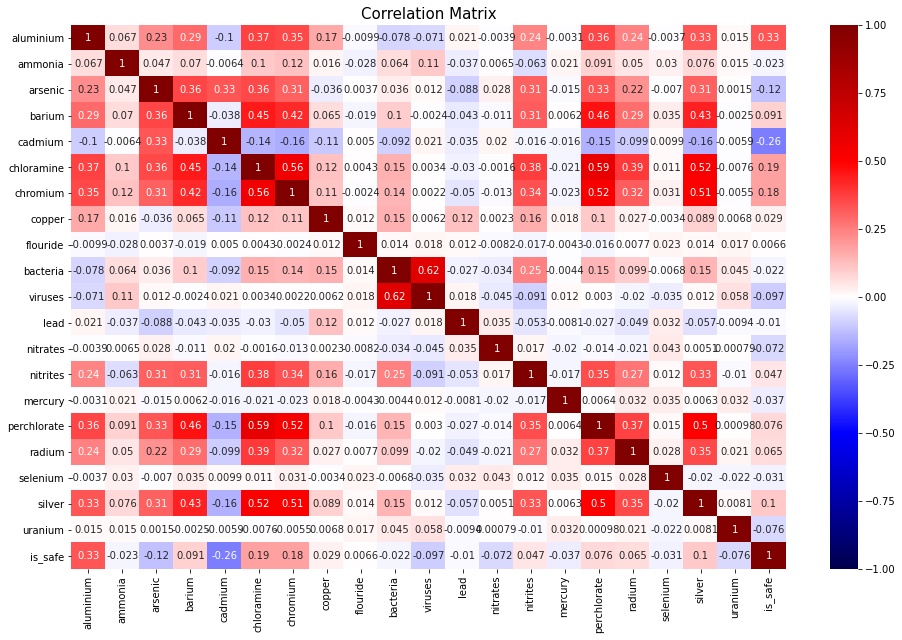

In [4]:
def plot_corr_matrix(data, features=None, annot=True, size=(16,10)):
    # MatPlotLib setup
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1,1,1)

    # Select features to correlate
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()

    # Use Seaborn to plot 
    ax = sns.heatmap(corr, annot=annot,
                    xticklabels=corr.columns,
                    yticklabels=corr.columns,
                    cmap="seismic",
                    vmin=-1, vmax=1)
    plt.title("Correlation Matrix", fontsize = 15)
    plt.show()
    
plot_corr_matrix(df, annot=True)

In [5]:
corrbar=abs(df.corr()['is_safe'])
corrbar.sort_values(ascending=False)[1:5]

aluminium     0.333974
cadmium       0.256034
chloramine    0.186704
chromium      0.182306
Name: is_safe, dtype: float64

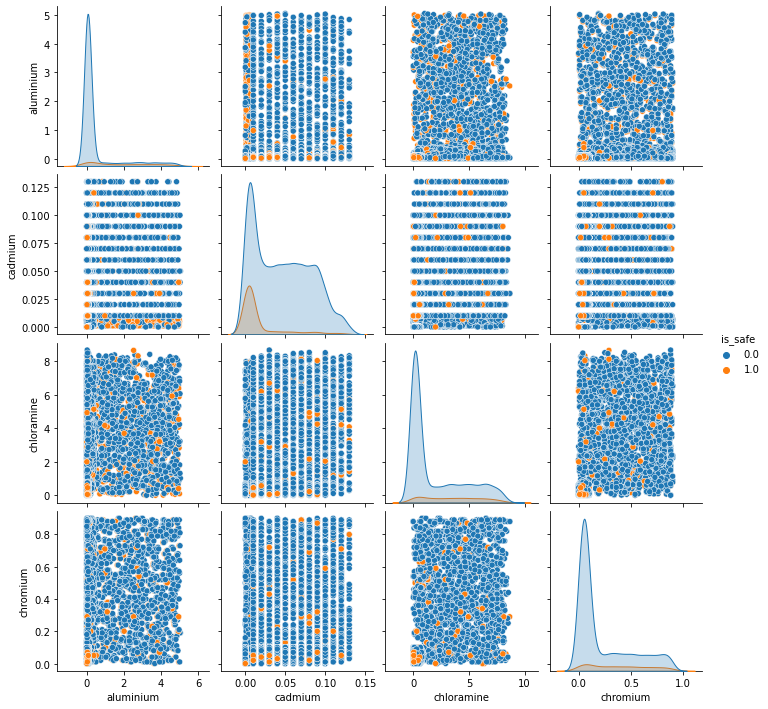

In [6]:
sns.pairplot(df,vars = ['aluminium','cadmium','chloramine','chromium'],hue='is_safe')

**PREGUNTA:** En principio cualquiera de estas características demasiado alta es signo de riesgo. ¿Qué conclusiones puede usted sacar de la matriz de correlaciones y los diagramas de dispersión? ¿Cree que es un problema fácilmente clasificable o no?

**Respuesta:** 
El aluminio es un uno de los elementos más seguros para el consumo humano y el cadmium seria el más inseguro para el consumo humano además de las gráfica de dispersión se puede observar que existen más posibilidad de que el agua sea insegura que segura

El problema de saber si el agua es segura o no depende mucho de la composición química de los elementos que contiene por lo cual no es un problema fácilmente clasificable ya que no depende solo de un elemento químico que contiene el agua



### 2.- Evaluación de Classificadores

Reserve un 20% de su dataset como conjunto de testing. 

Considere los siguientes clasificadores a entrenar con el conjunto de training
1. Nearest Neighbors Classifier with 30 neighbors
1. Support Vector Machine with Linear Kernel with $C=0.1$
1. Support Vector Machine with Radial Basis Function with C=1.0, $\gamma=1.5$
1. Random Forest with maximum depth of 10 and 10 estimators 
1. Artificial Neural Network with $\alpha = 1$
1. Naive Bayes
1. Quadratic Discriminant Analysis

Imprima la curva ROC de cada clasificador y reporte su accuracy, F1-score y AUC utilizando para la evaluación el conjunto de testing. Además, mida el tiempo de entrenamiento y el tiempo de clasificación de cada uno.

In [7]:
import sklearn.model_selection
train,test = sklearn.model_selection.train_test_split(df, test_size=0.2)
y_train = train['is_safe'].to_numpy().ravel()
y_test = test['is_safe'].to_numpy().ravel()
X_train = train.drop('is_safe',axis=1)
X_test = test.drop('is_safe',axis=1)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# for splitting data into training and testing
from sklearn.model_selection import train_test_split

# standardize features removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# multilayer perceptron classifier
from sklearn.neural_network import MLPClassifier

# K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Support vector machine, C-support vector classifier
from sklearn.svm import SVC

# radial basis function kernel (squared exponential kernel)
from sklearn.gaussian_process.kernels import RBF

# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble classifiers: Random forest and AdaBoost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Quadratic Discriminant Analysis classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics

In [9]:
names = ["Nearest Neighbors","SVM Linear","SVM rbf","RF","Neural Net",
         "Naive Bayes", "QDA"]        
        
classifiers = [
    KNeighborsClassifier(30),
    SVC(kernel="linear", C=0.1, probability = True),
    SVC(gamma=1.5, C=1, probability = True),
    RandomForestClassifier(max_depth=10, n_estimators=10),
    MLPClassifier(alpha=1),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

Nearest Neighbors 0.00299835205078125 0.3038463592529297
SVM Linear 9.321044445037842 0.0899660587310791
SVM rbf 23.698532342910767 1.7291386127471924
RF 0.09094786643981934 0.004979610443115234
Neural Net 4.309827089309692 0.0049953460693359375
Naive Bayes 0.0059986114501953125 0.003009796142578125
QDA 0.010993719100952148 0.0030002593994140625


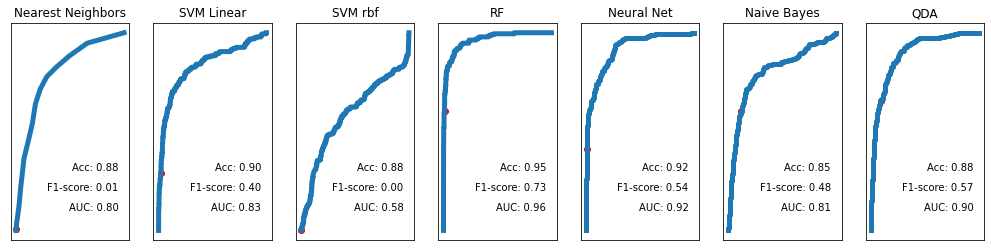

In [10]:
import time
i=1
plt.figure(figsize=(20,4))
for name, clf in zip(names, classifiers):
        ax = plt.subplot(1 , len(classifiers) + 1, i)
        

        start = time.time()
        # fit the model using the training set
        clf.fit(X_train, y_train)
        end = time.time()
        # compute the mean accuracy of the classifier
        score = clf.score(X_test, y_test)
        end2 = time.time()
        # compute ROC curve
        y_test_pred = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        acc = metrics.accuracy_score(y_test, y_test_pred >= 0.5)
        f1 = metrics.f1_score(y_test, y_test_pred >= 0.5)
        ax.set_xlim(-.05, 1.05)
        ax.set_ylim(-.05, 1.05)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(0.95, 0.3, "Acc: %.2f" % acc, ha = 'right')
        ax.text(0.95, 0.2, "F1-score: %.2f" % f1, ha = 'right')
        ax.text(0.95, 0.1, "AUC: %.2f" % auc, ha = 'right')
        ax.set_title(name)
        ax.plot(fpr, tpr, lw = 5)
        idx = np.argmin(np.abs(thresholds - 0.5))
        ax.scatter(fpr[idx], tpr[idx], marker = 'o', c = 'r')
        print(name,str(end-start),str(end2 - end))
        # counter 
        i += 1

**PREGUNTA:** Haga un ranking del mejor al peor clasificador, justificando brevemente basandose tanto en las 3 métricas de rendimiento como en los tiempos de cómputo. ¿Cómo es posible tener valores elevados de AUC pero bajos en F1-score? ¿Son los falsos positivos y falsos negativos igual de importantes en este caso? ¿Qué otra métrica podriamos utilizar en vez del F1-score en este caso?

**Respuesta:** Tomando las 3 métricas AUC,ACC,F1 el ranking queda como:
- RF
- Neural Net
- QDA
- Naive Bayes
- Nearest Neighbors 
- SVM Linear
- SVM rbf

La mejor métrica para comparar los clasificadores es AUC dado a que permite comparar qué tan correcta fue la clasificación de los datos dado cada uno de los clasificadores.

Se pueden tener bajos valores para F1-score dado a que este depende del punto de la curva ROC por lo que puede variar si se cambia el threshold del clasificador. Otra causa de este fenómeno se debe a que el dataset se encuentra desbalanceado.

En este caso los FP and FN no son igual de importantes dado a que un FN implica que la muestra de agua que se esta evaluando es potencialmente peligrosas para el ser humano y se esta considerando que no lo es.

Otra medida para realizar la comparación entre los clasificadores es recall que significa el porcentaje de una determinada clase identificada correctamente.



### 3 Análisis Libre

El análisis de la pregunta 2 es completamente estándar: se puede aplicar a cualquier problema de clasificación. No considera (por ejemplo) el desbalance entre clases ni la importancia relativa de los falsos negativos vs positivos, y ocupa parámetros estándar en vez de buscar mejores parámetros. Imagine que usted debe desarrollar una aplicación que determine si el agua es apta para el consumo humano. 

Dado que este es el último workshop, la idea es que usted pueda realizar el análisis sin una guía explícita. ¿Cuál seria entonces el siguiente paso del análisis a su criterio? Escriba código que genere los resultados (medidas, gráficos, cómputos) que usted considere pertinentes para enriquecer el análisis.



In [41]:
df = pd.read_csv('water.csv',na_values='#NUM!')
(df.isnull().sum(axis=1)!=0).sum() #numero de filas con valores nan
df.dropna(inplace=True)

#Rebalance de los datos
print('Clase 1 ',str((df['is_safe'] == 1).sum()))
print('clase 0 ',str((df['is_safe'] == 0).sum()))

class1 = df[df.is_safe == 1]
class0 = df[df.is_safe == 0]
df_balanced = class0.sample((df['is_safe'] == 1).sum())
df_balanced = df_balanced.append(class1)
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
df_balanced

Clase 1  912
clase 0  7084


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.10,2.22,0.001,3.32,0.001,7.85,0.06,1.69,1.37,0.93,...,0.161,2.65,1.90,0.009,41.23,1.80,0.04,0.09,0.01,1.0
1,0.01,3.60,0.001,2.69,0.005,5.75,0.15,0.60,1.29,0.04,...,0.145,8.47,1.25,0.006,55.40,7.80,0.05,0.33,0.06,0.0
2,0.05,25.00,0.020,0.85,0.100,0.08,0.07,0.04,1.32,0.00,...,0.192,13.28,0.69,0.002,11.34,0.52,0.09,0.02,0.09,0.0
3,0.02,11.86,0.100,0.51,0.100,0.02,0.06,0.02,1.33,0.00,...,0.004,18.29,0.43,0.001,6.53,0.71,0.08,0.10,0.04,0.0
4,0.13,6.05,0.040,2.00,0.005,6.85,0.40,1.64,0.29,0.31,...,0.177,14.61,1.61,0.005,34.70,2.18,0.05,0.19,0.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.72,9.47,0.010,3.49,0.001,3.23,0.07,0.86,1.29,0.39,...,0.016,11.34,1.39,0.008,30.21,6.62,0.01,0.43,0.04,1.0
1820,0.01,5.19,0.000,0.01,0.030,0.05,0.09,0.72,0.42,0.75,...,0.070,12.32,1.26,0.005,3.30,1.01,0.00,0.06,0.03,0.0
1821,2.67,7.23,0.040,3.38,0.002,3.82,0.75,1.93,0.18,0.00,...,0.040,6.22,1.65,0.007,42.42,5.34,0.04,0.03,0.06,1.0
1822,0.15,1.38,0.030,3.14,0.002,2.73,0.39,1.26,0.13,0.93,...,0.165,4.00,1.01,0.000,38.53,0.16,0.07,0.27,0.01,1.0


In [46]:
#Para los 3 mejores modelos de la pregunta anterior ver como se comportan con un dataset balanceado
names = ["RF","Neural Net","QDA"]        
        
classifiers = [
    RandomForestClassifier(max_depth=10, n_estimators=10),
    MLPClassifier(alpha=1),
    QuadraticDiscriminantAnalysis()]

RF 0.10504269599914551 0.00597691535949707


C:\Users\Yeriel\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Net 7.1018922328948975 0.003998279571533203
QDA 0.008999109268188477 0.005013227462768555


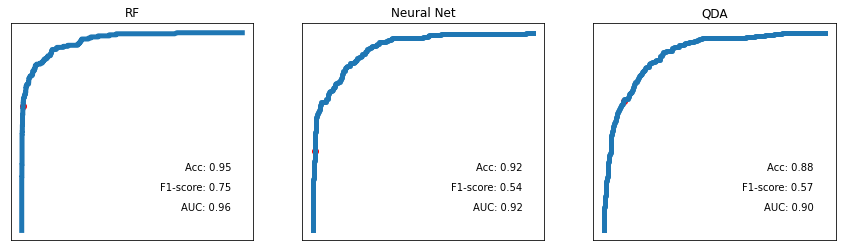

In [47]:
import time
i=1
plt.figure(figsize=(20,4))
for name, clf in zip(names, classifiers):
        ax = plt.subplot(1 , len(classifiers) + 1, i)
        start = time.time()
        # fit the model using the training set
        clf.fit(X_train, y_train)
        end = time.time()
        # compute the mean accuracy of the classifier
        score = clf.score(X_test, y_test)
        end2 = time.time()
        # compute ROC curve
        y_test_pred = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        acc = metrics.accuracy_score(y_test, y_test_pred >= 0.5)
        f1 = metrics.f1_score(y_test, y_test_pred >= 0.5)
        ax.set_xlim(-.05, 1.05)
        ax.set_ylim(-.05, 1.05)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(0.95, 0.3, "Acc: %.2f" % acc, ha = 'right')
        ax.text(0.95, 0.2, "F1-score: %.2f" % f1, ha = 'right')
        ax.text(0.95, 0.1, "AUC: %.2f" % auc, ha = 'right')
        ax.set_title(name)
        ax.plot(fpr, tpr, lw = 5)
        idx = np.argmin(np.abs(thresholds - 0.5))
        ax.scatter(fpr[idx], tpr[idx], marker = 'o', c = 'r')
        print(name,str(end-start),str(end2 - end))
        # counter 
        i += 1

In [32]:
#GridSearchCV para random RandomForest que es el mejor clasificador segun el estudia anterior

from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
parameters = {'max_depth':[10,15],'n_estimators':[10,15]}
#max_depth=10, n_estimators=10
clf = GridSearchCV(rf, parameters,scoring='f1')
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15], 'n_estimators': [10, 15]},
             scoring='f1')

In [45]:
y_test_pred = clf.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, y_test_pred)
acc = metrics.accuracy_score(y_test, y_test_pred >= 0.5)
f1 = metrics.f1_score(y_test, y_test_pred >= 0.5)
print('RF F1-score')
print('auc ',str(auc))
print('acc ',str(acc))
print('f1 ',str(f1))

RF
auc  0.9660940681493481
acc  0.954375
f1  0.7794561933534743


**PREGUNTA:** Justifique la importancia de su análisis libre con el lenguaje y las herramientas entregadas por el ramo, y redacte una conclusión general del workshop. 

**Respuesta:** El proceso que se realiza en el análisis libre permite tener una mejor clasificación de los datos dado a que apunta a tener la data más balanceada y para el mejor modelo que se está estudiando realizar una búsqueda exhaustiva en un rango para cada uno de los parámetros del clasificador esto permite tener el clasificador óptimo 


**BONUS (10 p):** ¿Qué deducción usted puede usted sacar de la *naturaleza* de este dataset después de utilizarlo?

**Respuesta:** El dataset original estaba desbalanceado y muchas de las variables no son concluyentes para el análisis de si es agua es segura dado a que su correlación con 'is_safe' es casi cero